28


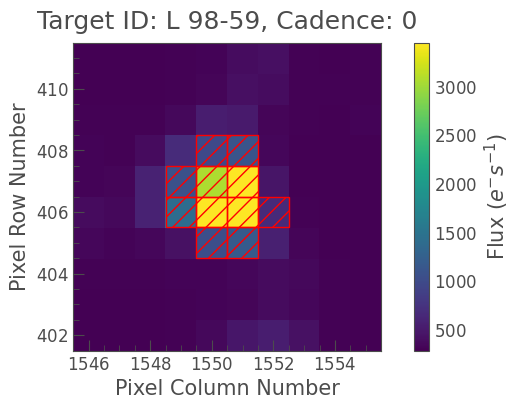

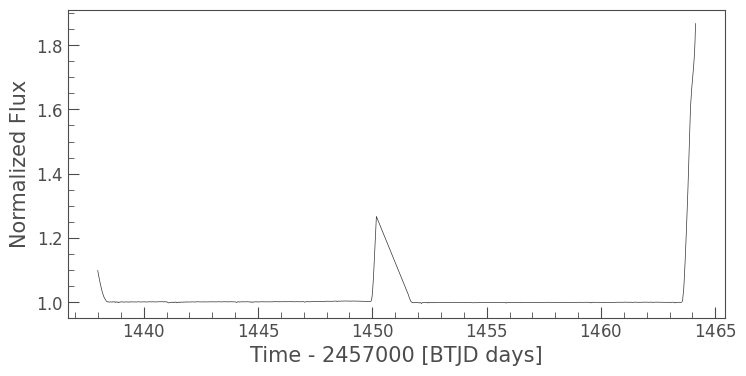

In [1]:
#FFI GRAPH WITH THRESHOLD
#hello
import lightkurve as lk
import matplotlib.pyplot as plt

search_ffi = lk.search_tesscut('L 98-59')

print(len(search_ffi))

ffi_data = search_ffi[0].download(cutout_size = 10)
target_mask = ffi_data.create_threshold_mask(threshold=10, reference_pixel='center')
n_target_pixels = target_mask.sum()
ffi_data.plot(aperture_mask=target_mask, mask_color='r')
# ffi_data.plot()
plt.show()
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)
ffi_norm = ffi_lc.normalize()

ffi_norm.plot()

plt.show()


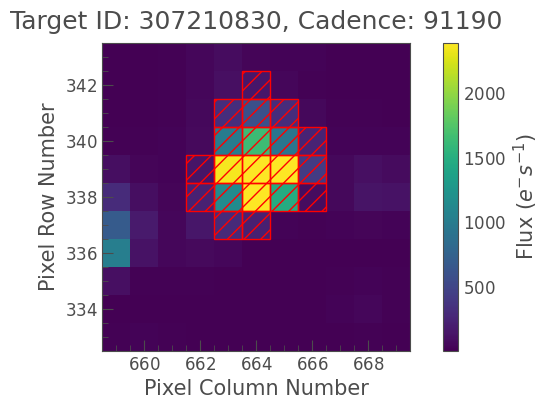

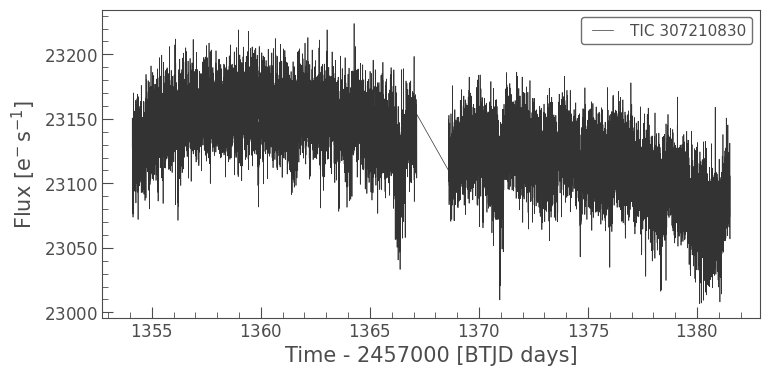

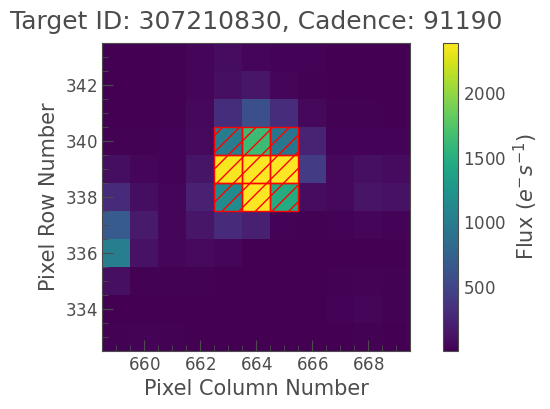

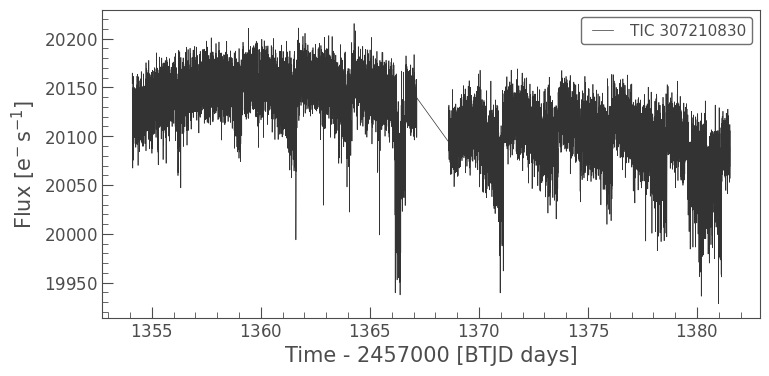

In [2]:
#FFI GRAPH WITH 1. PIPELINE (AUTO APERTURE) AND 2. WITH OWN APERTURE (APERTURE MASK WITH ARRAYS)
%matplotlib inline
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt

search_result = lk.search_targetpixelfile('L 98-59')
tpf_file = search_result[0].download()

tpf_file.plot(aperture_mask=tpf_file.pipeline_mask)
target_lc_old = tpf_file.to_lightcurve(aperture_mask=tpf_file.pipeline_mask)
target_lc_old.plot()
plt.show()

aper_new = np.zeros(tpf_file.shape[1:], dtype=bool)
aper_new[5:8, 4:7] = True
tpf_file.plot(aperture_mask=aper_new, mask_color='red')

target_lc_new = tpf_file.to_lightcurve(aperture_mask=aper_new)

target_lc_new.plot()
plt.show()

In [ ]:
#STITCHING TWO LIGHT CURVES TOGETHER

import lightkurve as lk
import matplotlib.pyplot as plt

search_result = lk.search_lightcurve("L 98-59", mission="TESS")
# print(search_result)
lc_sector2 = lk.search_lightcurve("L 98-59", author="SPOC", sector=2).download().normalize()
lc_sector5 = lk.search_lightcurve("L 98-59", author="SPOC", sector=5).download().normalize()



stitched_lc = lc_sector2.append(lc_sector5)
stitched_lc.plot(title="L 98-59: Sectors 2 and 5 Combined")

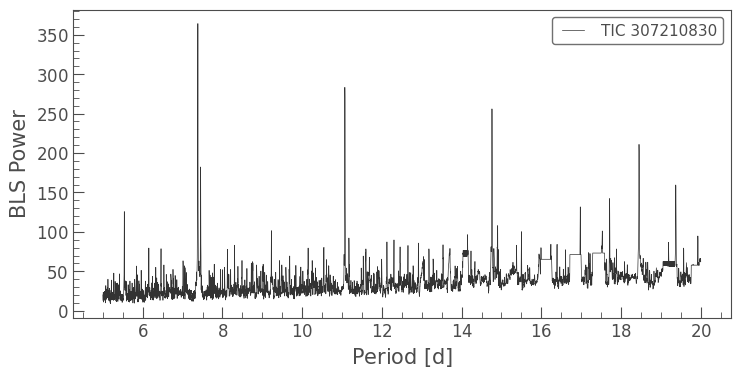

Duration of the planet's shadow was 0.05 d
The period of the planet's revolution is 7.382476495299058 d
The exact day of its first revolution is 1356.1974113410245


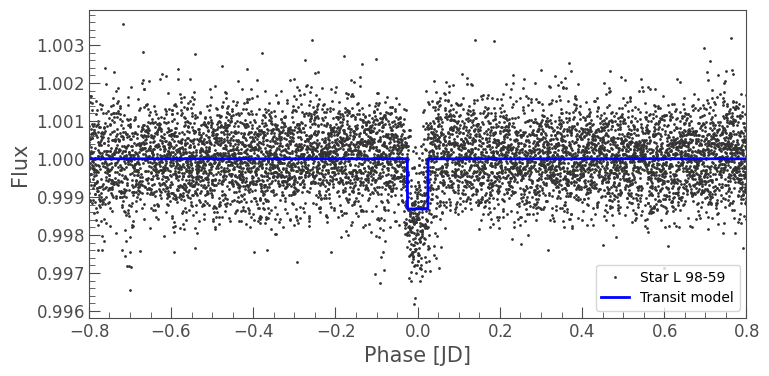

In [2]:
#MOST IMPORTANT - FINDING LARGEST PLANETS
#USE CADENCE MASK TO FIND OTHER, SMALLER PLANETS BY IGNORING THE LARGEST

%matplotlib inline
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np

search_result = lk.search_lightcurve('L 98-59', author='SPOC', sector=[2, 5])

lc_collection = search_result.download_all()
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()


period = np.linspace(5, 20, 5000) #note for pg- this tells the bls which period to which (10 to 20) and how many checkings in between

bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()    
plt.show()


#note to pg = this is taking out data from the periodogram to find the largest planet (D)
planet_d_period = bls.period_at_max_power
planet_d_t0 = bls.transit_time_at_max_power
planet_d_dur = bls.duration_at_max_power

# ax = lc.fold(period=planet_d_period, epoch_time=planet_d_t0).scatter()
# ax.set_xlim(-2, 2)
# planet_d_mask = bls.get_transit_mask(period=planet_d_period,
#                                      transit_time=planet_d_t0,
#                                      duration=planet_d_dur)

# masked_lc = lc[~planet_d_mask]

# ax = masked_lc.scatter()
# lc[planet_d_mask].scatter(ax=ax, c='r', label='Masked')

print(f"Duration of the planet's shadow was {planet_d_dur}")
print(f"The period of the planet's revolution is {planet_d_period}")
print(f"The exact day of its first revolution is {planet_d_t0}")

planet_d_model = bls.get_transit_model(period=planet_d_period,
                                       transit_time=planet_d_t0,
                                       duration=planet_d_dur) # note to pg = this is to make the model (the red box)

ax = lc.fold(period=planet_d_period, epoch_time=planet_d_t0).scatter(label = "Star L 98-59")
planet_d_model.fold(period = planet_d_period, epoch_time = planet_d_t0).plot(ax=ax, c='b', lw=2, label = "Transit model")
plt.legend()
ax.set_xlim(-0.8, 0.8)
plt.show()

In [ ]:
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()    
plt.show()

bls2 = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls2.plot()
plt.show()

<Figure size 1000x800 with 0 Axes>

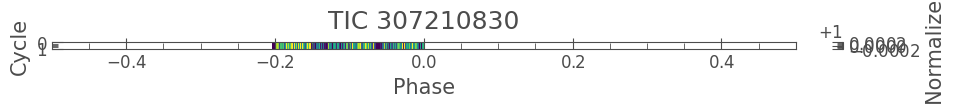

In [6]:
import matplotlib.pyplot as plt
# 1. Fold the light curve
plt.figure(figsize=(10, 8))
folded_lc = lc.fold(period=planet_d_period, epoch_time=planet_d_t0)

# 2. Plot the river
folded_lc.bin(time_bin_size=0.01).plot_river()
ax.set_xlim(-0.2, 0.2)


plt.show()